In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-be6ddd86-900e-1fd7-9dd1-18da0635a5e9)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
text_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/twitter-data.csv', encoding='ISO-8859-1', names=['sentiment', 'id', 'date', 'query', 'user_id', 'text'])
text_data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
text_df = text_data.drop(['id', 'date', 'query', 'user_id'], axis = 1)

In [ ]:
text_df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
text_df["sentiment"].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

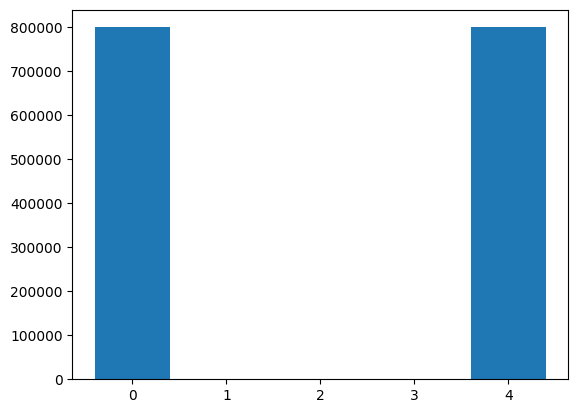

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

value_counts = text_df["sentiment"].value_counts()
plt.bar(value_counts.index, value_counts.values);

In [ ]:
text_df = text_df.sample(frac = 1, random_state = 42)
text_df.head()

,sentiment,text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [ ]:
text_df["sentiment"] = text_df['sentiment'].replace(4,1)
text_df['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(text_df, test_size = 0.3, random_state = 42)
len(train_val_df), len(test_df)

(1120000, 480000)

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_val_df['text'].to_numpy(),
                                                                            train_val_df['sentiment'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)
len(train_sentences), len(val_sentences)

(1008000, 112000)

In [ ]:
train_sentences[:5], train_labels[:5]

(array(["Skippin' Screen this morning. Feeling like shit ",
        "@IanFHood but I am working on this http://bit.ly/147YQR  I can't go to sleep ",
        'and God knows how many more SingStar and Buzz iterations announced. Rock Band Unplugged to be awesome, OnLive to be absent.  #e3',
        'Very bored right now. ',
        'this song called stolen, it soooo amazing!! it by Dashboard Confessional '],
       dtype=object),
 array([0, 1, 0, 0, 1]))

In [ ]:
# find an average number of tokens or words in training tweets

round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

13

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000
max_length = 13

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = 'This flower is beautiful.'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 13), dtype=int64, numpy=
array([[  28, 3953,    9,  324,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()


top_5_words = words_in_vocab[:5]
last_5_words = words_in_vocab[-5:]

print(top_5_words)
print(last_5_words)

['', '[UNK]', 'i', 'to', 'the']
['activated', 'absence', '4rm', '4everbrandy', '2days']


In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = max_length)

embedding

In [ ]:
import random

random_sentence = random.choice(train_sentences)

print(f'Original Sentence: \n {random_sentence} \n \n Embedded Version: \n')

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Sentence: 
 @paperboy1 too little place, but it is better to be a victim than to increase brutality. O, that sounds quite religious  
 
 Embedded Version: 



<tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
array([[[ 0.04809959,  0.0079774 , -0.02532228, ...,  0.03872578,
         -0.01825603, -0.024987  ],
        [-0.00570021, -0.01468723, -0.00951844, ..., -0.00021293,
          0.03306702, -0.00241574],
        [ 0.01170317, -0.04120754, -0.043904  , ..., -0.03354808,
          0.0154934 ,  0.00527803],
        ...,
        [-0.01731537,  0.01930609,  0.0450941 , ...,  0.01183786,
         -0.02148552,  0.0160506 ],
        [ 0.020506  , -0.01861686, -0.04115368, ..., -0.03414804,
          0.01941809, -0.04329653],
        [ 0.0095019 , -0.01950498,  0.03487698, ..., -0.02878357,
         -0.04429657,  0.0228592 ]]], dtype=float32)>

In [ ]:
sample_embed.shape

TensorShape([1, 13, 128])

# 1. Baseline Model (Naive Bayes ALlgorithm)

*   Tfidf Vectorizer
*   Naive Bayes (Multinomial Naive Bayes)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7729732142857143

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average= 'weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1_score': model_f1}
  return model_results

In [ ]:
baseline_pred = model_0.predict(val_sentences)

In [ ]:
baseline_results = calculate_results(val_labels, baseline_pred)
baseline_results

{'accuracy': 77.29732142857144,
 'precision': 0.775550455034454,
 'recall': 0.7729732142857143,
 'f1_score': 0.7724444386428315}

In [ ]:
import pickle

filename = '/content/drive/My Drive/Colab Notebooks/saved models/model_naive_bayes.sav'
pickle.dump(model_0, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))


test_df_pred = loaded_model.predict(test_df['text'])
result = calculate_results(test_df['sentiment'], test_df_pred)

In [ ]:
result

{'accuracy': 77.190625,
 'precision': 0.7743318933864105,
 'recall': 0.77190625,
 'f1_score': 0.771383578915849}

In [ ]:
def prediction(review):
  score = loaded_model.predict(review)
  score= score[0]
  return score

In [ ]:
prediction(['This is beautiful'])

1

In [ ]:
prediction(['This is bad'])

0

# 2. Feed-Forward Neural Network (Dense Model)


In [ ]:
from tensorflow.keras import layers

input = layers.Input(shape=(), dtype = tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(input, output, name = 'model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 13)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 13, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 10,
                              batch_size = 64,
                              validation_data = (val_sentences, val_labels))

Epoch 1/10
15750/15750 [==============================] - 213s 13ms/step - loss: 0.5047 - accuracy: 0.7633 - val_loss: 0.4970 - val_accuracy: 0.7687
Epoch 2/10
15750/15750 [==============================] - 176s 11ms/step - loss: 0.4928 - accuracy: 0.7709 - val_loss: 0.4956 - val_accuracy: 0.7688
Epoch 3/10
15750/15750 [==============================] - 179s 11ms/step - loss: 0.4907 - accuracy: 0.7727 - val_loss: 0.4948 - val_accuracy: 0.7692
Epoch 4/10
15750/15750 [==============================] - 182s 12ms/step - loss: 0.4895 - accuracy: 0.7735 - val_loss: 0.4945 - val_accuracy: 0.7709
Epoch 5/10
15750/15750 [==============================] - 170s 11ms/step - loss: 0.4887 - accuracy: 0.7743 - val_loss: 0.4947 - val_accuracy: 0.7710
Epoch 6/10
15750/15750 [==============================] - 172s 11ms/step - loss: 0.4881 - accuracy: 0.7745 - val_loss: 0.4941 - val_accuracy: 0.7701
Epoch 7/10
15750/15750 [==============================] - 172s 11ms/step - loss: 0.4876 - accuracy: 0.7750

In [ ]:
model_1.save('/content/drive/My Drive/Colab Notebooks/saved models/model_neural_model')

In [ ]:
def prediction_1(review):
  score = model_1.predict(review)
  score= score[0]
  return score

In [ ]:
prediction_1(['This is beautiful'])

1/1 [==============================] - 0s 206ms/step


array([0.6882779], dtype=float32)

In [ ]:
prediction_1(['This is bad'])

1/1 [==============================] - 0s 35ms/step


array([0.273898], dtype=float32)

In [ ]:
prediction_1(['Weather is amazing'])

1/1 [==============================] - 0s 52ms/step


array([0.6733148], dtype=float32)

In [ ]:
for sample_sentence in test_df['text'][:5]:
  print(prediction_1([sample_sentence]))

1/1 [==============================] - 0s 33ms/step
[0.29590392]
1/1 [==============================] - 0s 37ms/step
[0.46470678]
1/1 [==============================] - 0s 36ms/step
[0.4525037]
1/1 [==============================] - 0s 43ms/step
[0.00864171]
1/1 [==============================] - 0s 35ms/step
[0.8381239]


In [ ]:
test_sentences = test_df['text'].to_numpy()
test_labels = test_df['sentiment'].to_numpy()

In [ ]:
model_1_pred = model_1.predict(test_sentences)

15000/15000 [==============================] - 113s 8ms/step


In [ ]:
model_1_pred_squeeze = tf.squeeze(tf.round(model_1_pred))

In [ ]:
calculate_results(test_labels, model_1_pred_squeeze)

{'accuracy': 77.14625000000001,
 'precision': 0.7721082371188153,
 'recall': 0.7714625,
 'f1_score': 0.7713357370710073}

# Model 3 - LSTM Recurrent Neural Network

In [ ]:
input = layers.Input(shape=(), dtype = tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1, activation = 'sigmoid')(x)

model_2 = tf.keras.Model(input, output, name = 'model_2_LSTM')

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 13)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 13, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 13, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              batch_size = 64,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
15750/15750 [==============================] - 270s 17ms/step - loss: 0.4497 - accuracy: 0.7870 - val_loss: 0.4406 - val_accuracy: 0.7906
Epoch 2/5
15750/15750 [==============================] - 223s 14ms/step - loss: 0.4244 - accuracy: 0.8009 - val_loss: 0.4371 - val_accuracy: 0.7953
Epoch 3/5
15750/15750 [==============================] - 219s 14ms/step - loss: 0.4087 - accuracy: 0.8100 - val_loss: 0.4338 - val_accuracy: 0.7963
Epoch 4/5
15750/15750 [==============================] - 232s 15ms/step - loss: 0.3942 - accuracy: 0.8184 - val_loss: 0.4321 - val_accuracy: 0.7965
Epoch 5/5
15750/15750 [==============================] - 299s 19ms/step - loss: 0.3791 - accuracy: 0.8269 - val_loss: 0.4429 - val_accuracy: 0.7951


In [ ]:
model_2.save('/content/drive/My Drive/Colab Notebooks/saved models/model_LSTM', save_format='tf')

# Model-3 GRU (Gated Recurrent Unit)

In [ ]:
input = layers.Input(shape = (), dtype= tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1, activation = 'sigmoid')(x)

model_3 = tf.keras.Model(input, output, name = 'model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 13)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 13, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 13, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              batch_size = 64,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
15750/15750 [==============================] - 247s 15ms/step - loss: 0.4141 - accuracy: 0.8078 - val_loss: 0.4397 - val_accuracy: 0.7950
Epoch 2/5
15750/15750 [==============================] - 219s 14ms/step - loss: 0.3910 - accuracy: 0.8205 - val_loss: 0.4442 - val_accuracy: 0.7942
Epoch 3/5
15750/15750 [==============================] - 213s 14ms/step - loss: 0.3761 - accuracy: 0.8289 - val_loss: 0.4476 - val_accuracy: 0.7910
Epoch 4/5
15750/15750 [==============================] - 213s 13ms/step - loss: 0.3613 - accuracy: 0.8371 - val_loss: 0.4523 - val_accuracy: 0.7898
Epoch 5/5
15750/15750 [==============================] - 211s 13ms/step - loss: 0.3462 - accuracy: 0.8453 - val_loss: 0.4687 - val_accuracy: 0.7887


In [ ]:
model_3.save('/content/drive/My Drive/Colab Notebooks/saved models/model_3', save_format='tf')

# Model-4 Bidirectional LSTM

In [ ]:
input = layers.Input(shape = (), dtype = tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences= True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1, activation = 'sigmoid')(x)

model_4 = tf.keras.Model(input, output, name = 'model_4_bidirectional_LSTM')

model_4.summary()

Model: "model_4_bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 13)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 13, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 13, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                        

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4_history = model_4.fit(train_sentences, train_labels, batch_size = 64, epochs= 5, validation_data = (val_sentences, val_labels))

Epoch 1/5
15750/15750 [==============================] - 317s 20ms/step - loss: 0.4483 - accuracy: 0.7878 - val_loss: 0.4413 - val_accuracy: 0.7907
Epoch 2/5
15750/15750 [==============================] - 281s 18ms/step - loss: 0.4239 - accuracy: 0.8015 - val_loss: 0.4360 - val_accuracy: 0.7954
Epoch 3/5
15750/15750 [==============================] - 296s 19ms/step - loss: 0.4088 - accuracy: 0.8101 - val_loss: 0.4321 - val_accuracy: 0.7974
Epoch 4/5
15750/15750 [==============================] - 331s 21ms/step - loss: 0.3948 - accuracy: 0.8182 - val_loss: 0.4291 - val_accuracy: 0.7974
Epoch 5/5
15750/15750 [==============================] - 303s 19ms/step - loss: 0.3804 - accuracy: 0.8265 - val_loss: 0.4412 - val_accuracy: 0.7952


In [ ]:
model_4.save('/content/drive/My Drive/Colab Notebooks/saved models/model_Bi_LSTM', save_format ='tf')

In [ ]:
model_4_pred = model_4.predict(test_sentences)
model_4_pred_squeeze = tf.squeeze(tf.round(model_4_pred))

15000/15000 [==============================] - 133s 9ms/step


In [ ]:
calculate_results(test_labels, model_4_pred_squeeze)

{'accuracy': 79.59208333333333,
 'precision': 0.7960458080219203,
 'recall': 0.7959208333333333,
 'f1_score': 0.7959024393198927}

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, model_4_pred_squeeze)

array([[188875,  51398],
       [ 46560, 193167]])

# Model-5 Convolutional Neural Network (Convo1D)

In [ ]:
input = layers.Input(shape =(), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.Conv1D(filters=32,
                   kernel_size = 5,
                   activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(1, activation = 'sigmoid')(x)

model_5 = tf.keras.Model(input, output, name = 'model_5_conv1D')

In [ ]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 13)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 13, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)              

In [ ]:
model_5.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              batch_size=64,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels))

Epoch 1/5
15750/15750 [==============================] - 232s 14ms/step - loss: 0.4748 - accuracy: 0.7718 - val_loss: 0.4577 - val_accuracy: 0.7821
Epoch 2/5
15750/15750 [==============================] - 178s 11ms/step - loss: 0.4341 - accuracy: 0.7972 - val_loss: 0.4583 - val_accuracy: 0.7840
Epoch 3/5
15750/15750 [==============================] - 172s 11ms/step - loss: 0.4044 - accuracy: 0.8154 - val_loss: 0.4664 - val_accuracy: 0.7795
Epoch 4/5
15750/15750 [==============================] - 180s 11ms/step - loss: 0.3742 - accuracy: 0.8333 - val_loss: 0.4773 - val_accuracy: 0.7763
Epoch 5/5
15750/15750 [==============================] - 180s 11ms/step - loss: 0.3448 - accuracy: 0.8498 - val_loss: 0.5003 - val_accuracy: 0.7736


In [ ]:
model_5.save('/content/drive/My Drive/Colab Notebooks/saved models/model_5', save_format ='tf')

In [ ]:
model_5_val_pred = model_5.predict(val_sentences)

3500/3500 [==============================] - 10s 3ms/step


In [ ]:
model_5_val_pred = tf.squeeze(tf.round(model_5_val_pred))
model_5_val_pred

<tf.Tensor: shape=(112000,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
calculate_results(val_labels, model_5_val_pred)

{'accuracy': 77.3625,
 'precision': 0.7736262760892225,
 'recall': 0.773625,
 'f1_score': 0.7736246589209842}

In [ ]:
model_5_test_pred = model_5.predict([test_df['text']])

15000/15000 [==============================] - 107s 7ms/step


In [ ]:
model_5_test_pred = tf.squeeze(tf.round(model_5_test_pred))
model_5_test_pred

In [ ]:
test_labels = test_df["sentiment"].to_numpy()
len(test_labels)

480000

In [ ]:
calculate_results(test_labels, model_5_test_pred)

{'accuracy': 77.37895833333333,
 'precision': 0.7737907678475056,
 'recall': 0.7737895833333334,
 'f1_score': 0.7737896409197952}

In [ ]:
sample= ['This is beautiful', 'I am in love with you.', 'This is the scariest thing i have ever seen.', 'I saw a murder in a cafe.']

print(f"Probaility: {model_5.predict(sample)}")
print(f"Label is: {tf.squeeze(tf.round(model_5.predict(sample)))}")

1/1 [==============================] - 0s 41ms/step
Probaility: [[0.8303576 ]
 [0.9256722 ]
 [0.00568792]
 [0.5738705 ]]
1/1 [==============================] - 0s 45ms/step
Label is: [1. 1. 0. 1.]
